<a href="https://colab.research.google.com/github/peterjheile/AML-HWK3-Q1/blob/main/main_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Data loading and preliminary analysis***

In [3]:
#Code to download the dataset into google colab
!git clone https://github.com/peterjheile/AML-HWK3-Q1.git

#local filepath to the dataset (just a folder with a bunch of images) (Run for Google Colab)
dataset_filepath = "/content/AML-HWK3-Q1/Dataset"


fatal: destination path 'AML-HWK3-Q1' already exists and is not an empty directory.


In [4]:
# #local filepath to the dataset (just a folder with a bunch of images) (Run for VS CODE)
# dataset_filepath = "Dataset"

In [5]:
#First, we want to get all of our data instances and classes to use. I will use PIL library to load the images because I have used it before and it is simple.
import numpy as np
from PIL import Image
import os



#Create container for dataset features (pixels) and dataset labels (rock type)
dataset_features = []
dataset_labels = []


#iteratee through each image and add each image isntance into an array (and convert the result to a numpy array) for features
#Also get the Rocktype and add it to the labels container
for image_name in os.listdir(dataset_filepath):
    image_filepath = os.path.join(dataset_filepath, image_name)
    if image_filepath[-3:] == "jpg":

        #label (rocktype) and features (pixels). the First charachter is the image class
        image_features = np.array(Image.open(image_filepath).convert('L'))
        image_label = image_name[0].upper()

        #add to respective container
        dataset_features.append(image_features)
        dataset_labels.append(image_label)

#now convert each container to numpy arrays (this will help later on when we are doiong a lot data manipulation and calculations)
dataset_features = np.array(dataset_features)
dataset_labels = np.array(dataset_labels)

rock_type_integer = []
for rock_type in dataset_labels:
    if rock_type == "I":
        rock_type_integer.append(0)
    elif rock_type == "M":
        rock_type_integer.append(1)
    elif rock_type == "S":
        rock_type_integer.append(2)

In [6]:
#Now I want to do a little bit of visualization just so we understand the dataset we are working at

#First I want to see if all the images are the same size. If they are not, I am goiong to resize them all. Image check will be zero if all imagea re the same size
image_size = dataset_features[0].shape
image_check = sum([(image.shape != image_size) for image in dataset_features])

#print results
print(f"All Images Have Same Size: {image_check == 0}")

print(f"\nTotal Dataset Instances: {len(dataset_labels)}")
print(f"Individual Image Shape: {image_size}")

#Yay! They are all the same shape :)

All Images Have Same Size: True

Total Dataset Instances: 360
Individual Image Shape: (800, 800)


Total Classes: 3


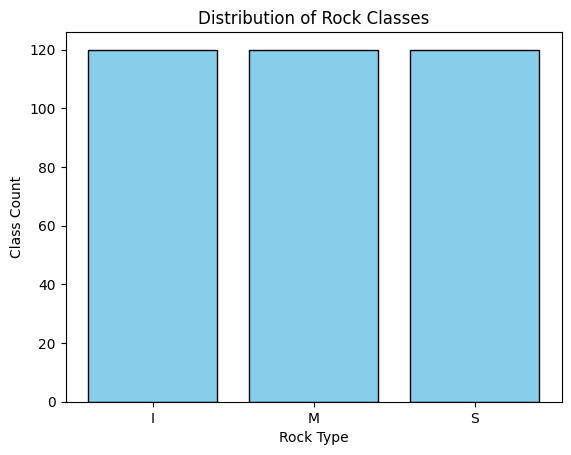

In [7]:
#And now also just a little information about our labels

#First I want to see how many labels we have (should be 3 classes), and I also want to see how amyn isntances we have of each class and plot its histogram.
#This could be usefew for if we accidentally train or test on disporportionate class instances and just to generally know
# Create a histogram of the labels
import matplotlib.pyplot as plt

classes, classes_counts = np.unique(dataset_labels, return_counts=True)

#Plot the histogram
plt.bar(classes, classes_counts, color='skyblue', edgecolor='black')

plt.xlabel('Rock Type')
plt.ylabel('Class Count')
plt.title('Distribution of Rock Classes')


print(f"Total Classes: {len(classes)}")

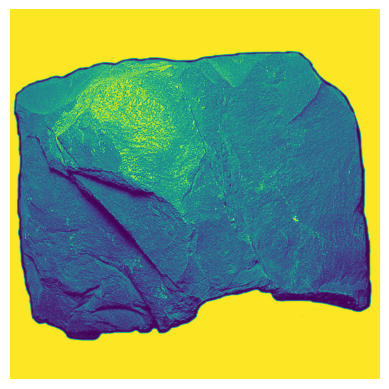

In [8]:
#Just some auxillary code to visualize the images from the dataset_features

def display_image(image_array):
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

display_image(dataset_features[140])

In [9]:
#For using PCA or any other algorithm, we would need the data to be in n*m shape where n is the number of instances
# i.e. 360 in this case, and m is the number of features which is 1920000 (Damnnn!) in this case.
# Following code converts our data into these required dimensions:

imageog = np.array([rock_pixels.flatten() for rock_pixels in dataset_features])
print(imageog.shape)

(360, 640000)


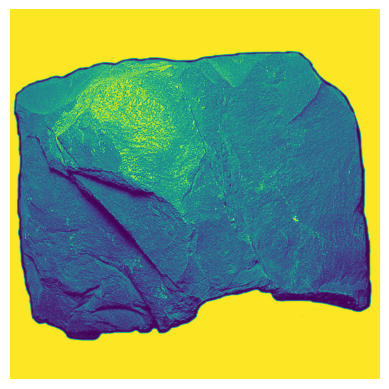

In [10]:
#Auxillary function: Just checking if we can retrive the iamge from this reshaped data
def reshape_and_display(flat_image_array):
    image = flat_image_array.reshape(800, 800)
    display_image(image)

reshape_and_display(imageog[140])

***Question 1***

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(imageog)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1
print(d)

158


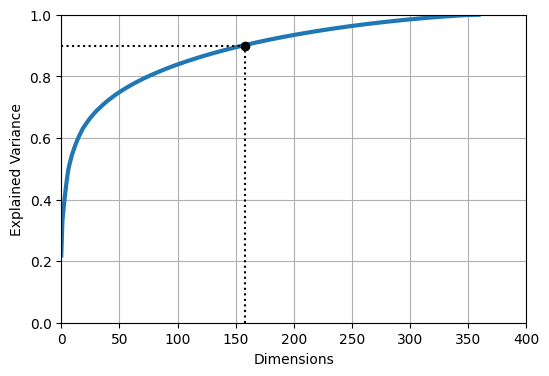

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")
plt.grid(True)

As we see from above, we need 158 components to keep more than 90% of the varience.

***Question 2***

In [13]:
pca = PCA(n_components=158)
image_downsized = pca.fit_transform(imageog)
print(image_downsized.shape)

(360, 158)


In [14]:
image_recovered = pca.inverse_transform(image_downsized)
print(image_recovered.shape)

(360, 640000)


Printing image indices:  [254 318 353 193 191 347   0 151 219 328]


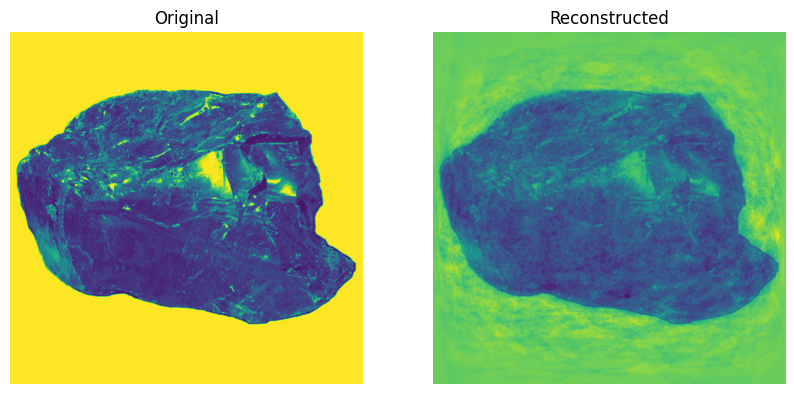

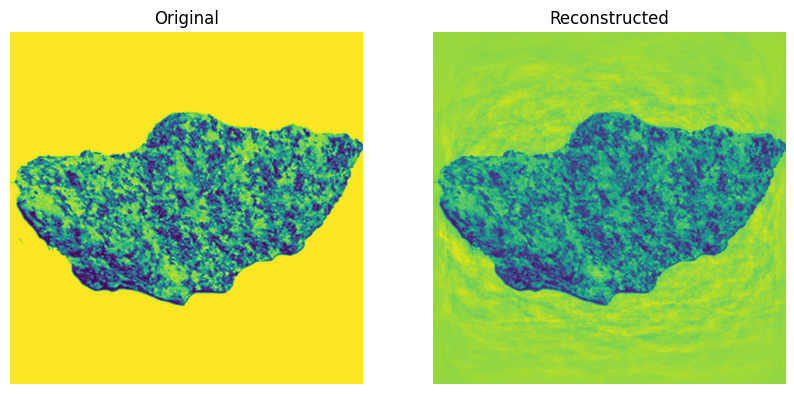

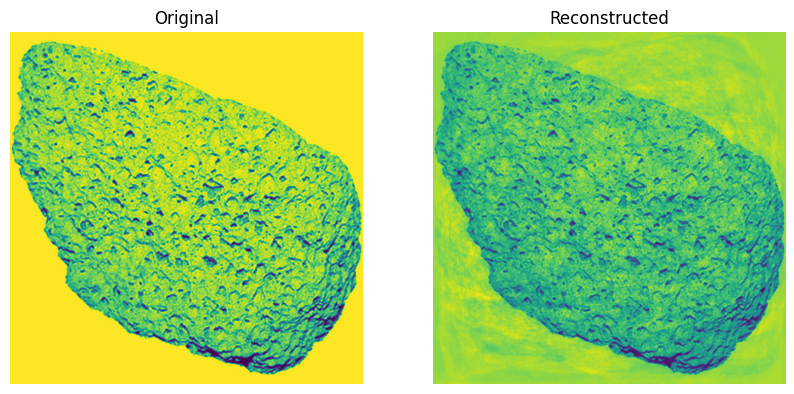

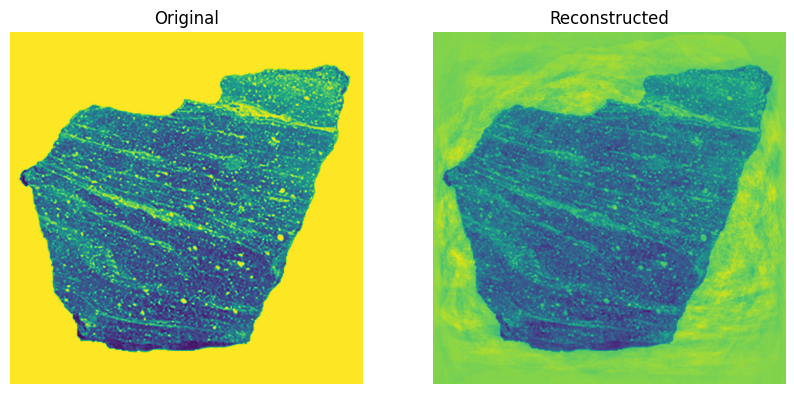

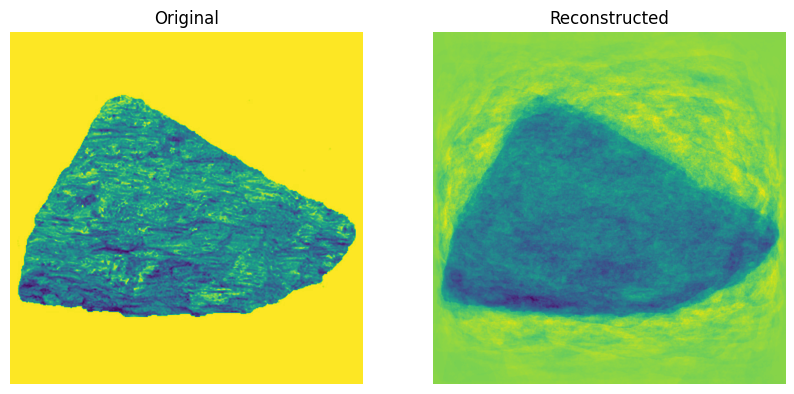

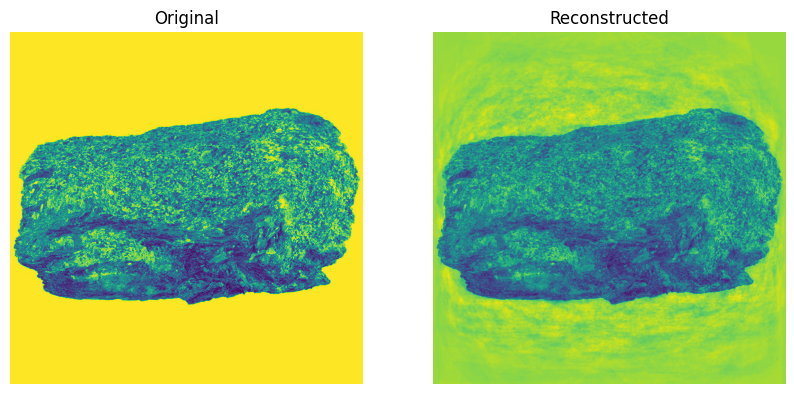

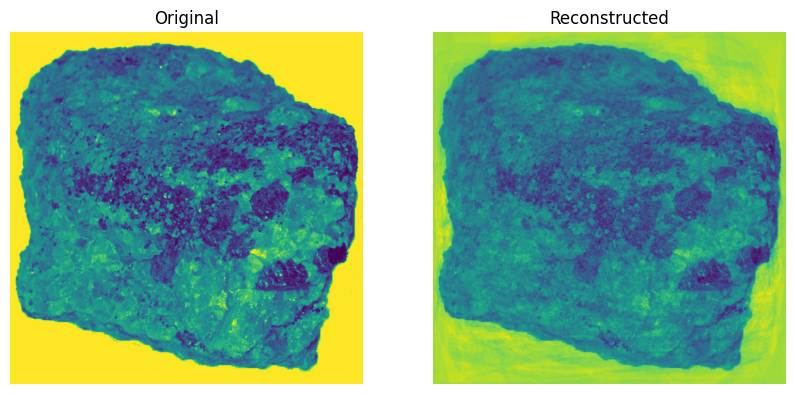

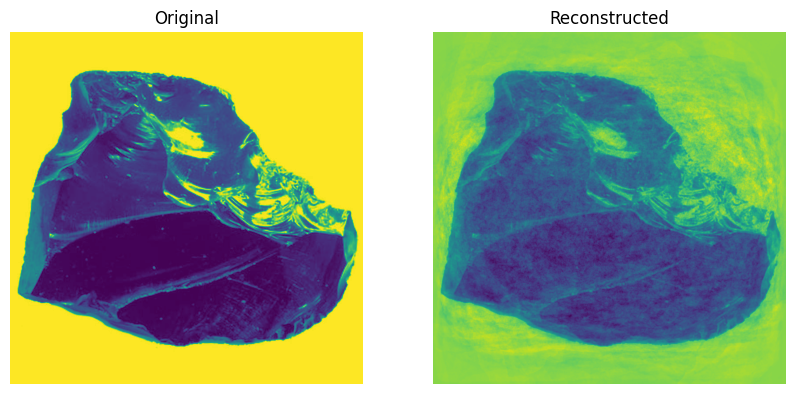

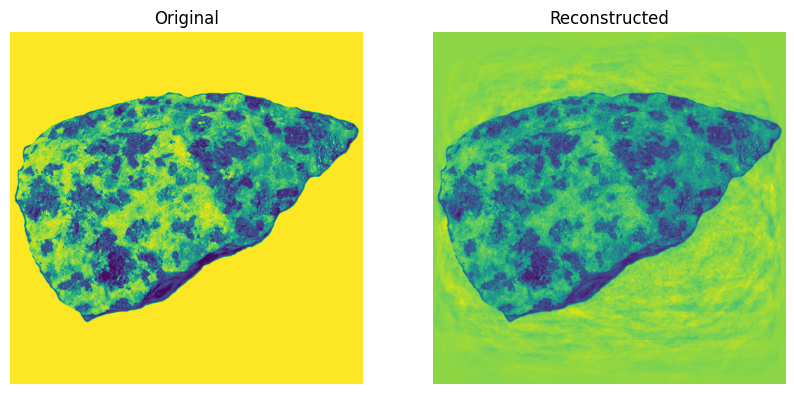

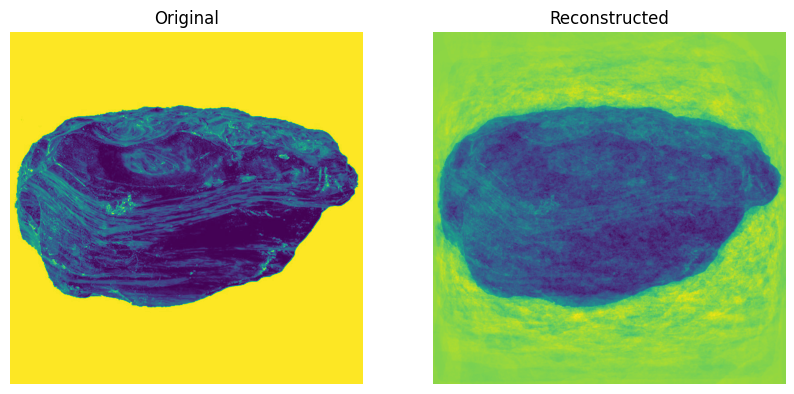

In [15]:
choice_image_index = np.random.choice([i for i in range(360)],10,replace=False)
print("Printing image indices: ", choice_image_index)

for image_index in choice_image_index:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    image = imageog[image_index].reshape(800, 800)
    plt.imshow(image)
    plt.title("Original")
    plt.axis('off')
    plt.subplot(122)
    image = image_recovered[image_index].reshape(800, 800)
    plt.imshow(image)
    plt.title("Reconstructed")
    plt.axis('off')
    plt.show()

Interesting! The reconstructed images are very much similar to the original ones!

***Question 3: PCA***

In [16]:
pca2 = PCA(n_components=2)
image_downsized2 = pca2.fit_transform(imageog)
image_recovered2 = pca2.inverse_transform(image_downsized2)

In [18]:
print("Variance explained by first two components:",pca.explained_variance_ratio_[0],"and",pca.explained_variance_ratio_[1])

print("Sum of the variance explained by 2 dimensions: ",pca2.explained_variance_ratio_.sum())

Variance explained by first two components: 0.21799204228916327 and 0.11386590540803503
Sum of the variance explained by 2 dimensions:  0.33185794769719806


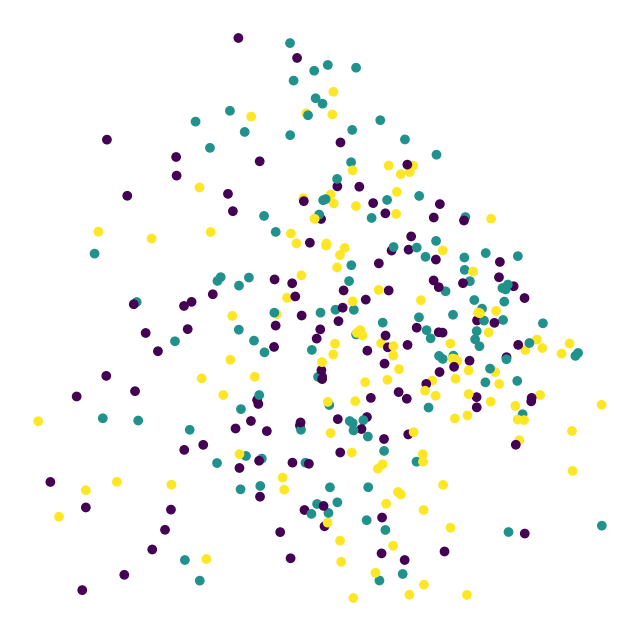

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(image_downsized2[:,0],image_downsized2[:,1], c = rock_type_integer)
plt.axis("off")
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.1, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 3)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 3),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(800, 800)
                imagebox = AnnotationBbox(OffsetImage(image, zoom=0.05),
                                          image_coord)
                ax.add_artist(imagebox)

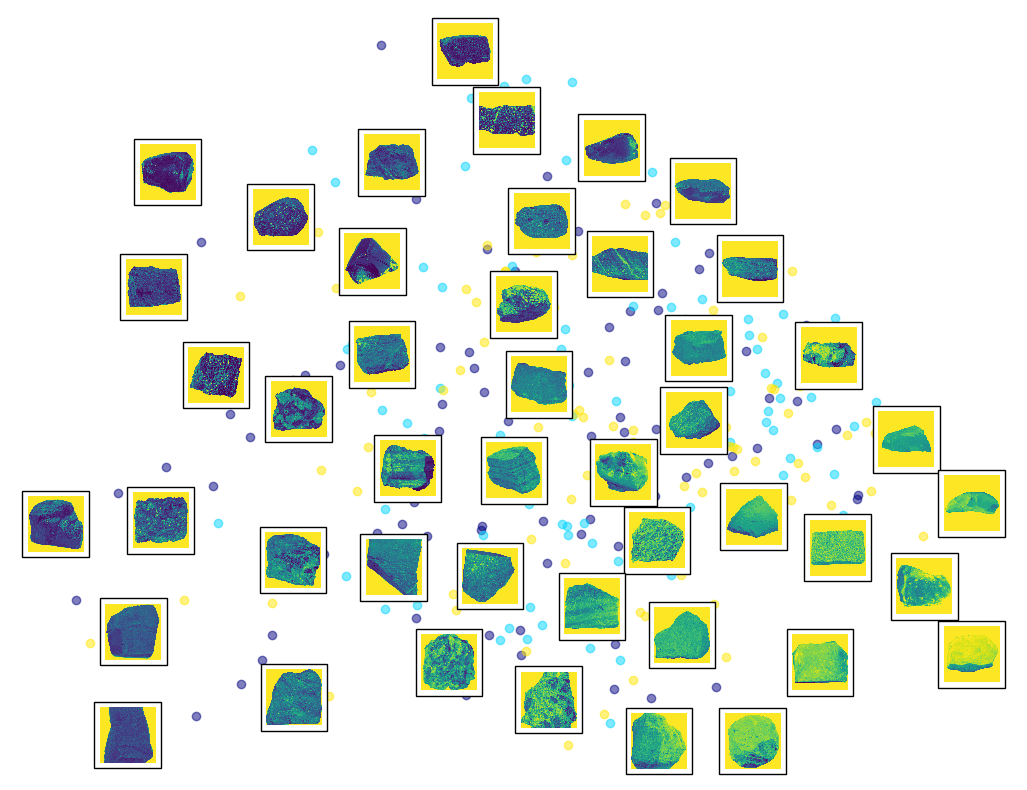

In [21]:

plot_digits(X = image_downsized2, y = rock_type_integer, images = imageog)

***Question 3: t-SNE***

***Question 3: LLE***

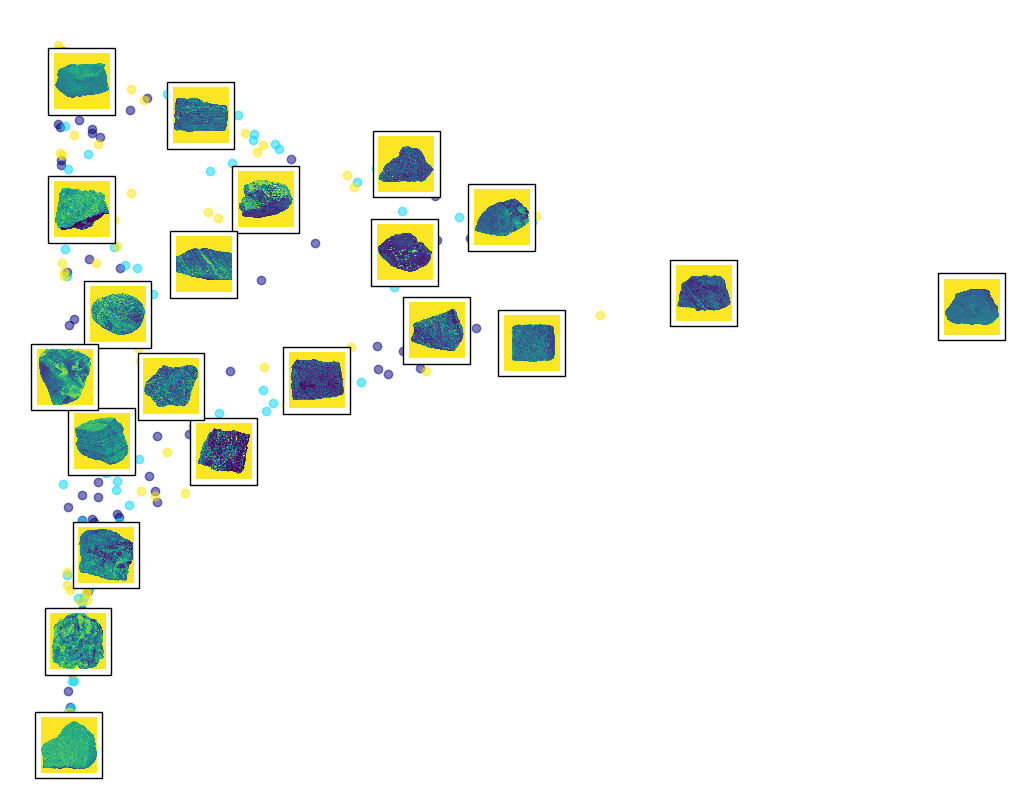

In [22]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
images_lle_reduced = lle.fit_transform(imageog)
plot_digits(X = images_lle_reduced, y = rock_type_integer, images = imageog)
plt.show()

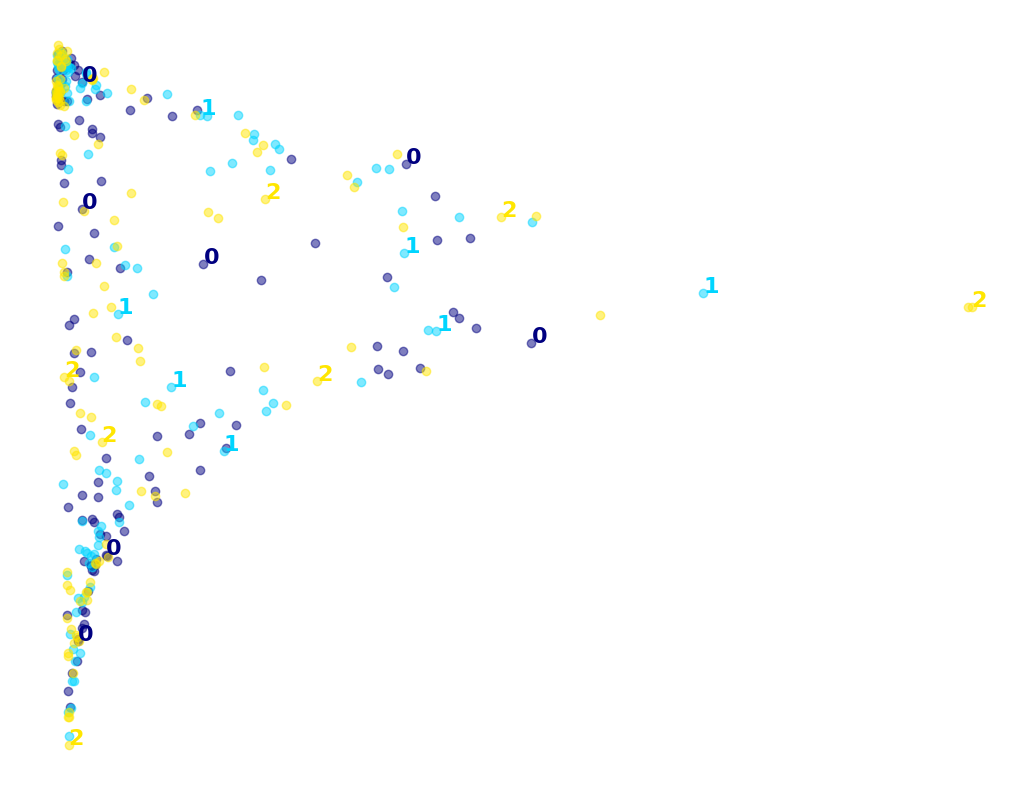

In [23]:
plot_digits(X = images_lle_reduced, y = rock_type_integer, images = None)
plt.show()

***Question 3: MDS***

In [28]:
#implementation of Multi Dimensional Scaling (MDS)
from sklearn.manifold import MDS

mds = MDS(n_components=2, normalized_stress=False, random_state=42)
X_reduced_mds = mds.fit_transform(imageog)


[0, 1, 6, 10, 13, 15, 16, 17, 21, 25, 33, 35, 36, 37, 38, 39, 40, 50, 53, 55, 62, 63, 64, 66, 69, 72, 73, 75, 81, 83, 87, 89, 91, 92, 95, 99, 100, 106, 111, 123, 124, 131, 132, 133, 136, 141, 142, 145, 146, 147, 149, 151, 153, 156, 162, 167, 172, 177, 180, 182, 183, 184, 186, 187, 189, 193, 194, 200, 201, 205, 211, 213, 214, 219, 229, 235, 236, 238, 246, 248, 249, 254, 255, 259, 260, 268, 272, 273, 274, 276, 279, 283, 286, 289, 293, 295, 296, 300, 302, 305, 307, 308, 311, 313, 315, 318, 319, 324, 328, 329, 341, 342, 343, 350, 351, 352, 353, 356, 357, 358]


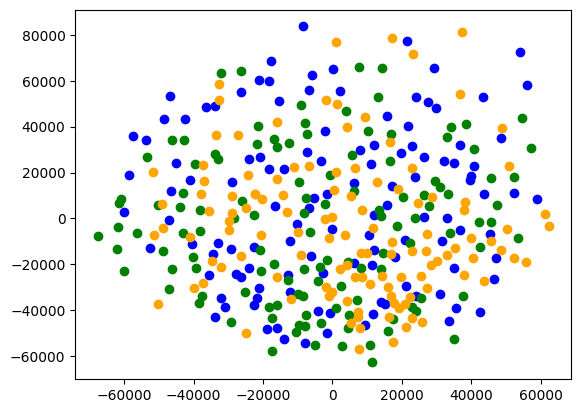

In [30]:
fig=plt.figure()
ax1 = fig.add_subplot(111)

#loading the indexes in individual arrays for plotting a scatter plot based on their respective labels
index_i=[]
index_m=[]
index_s=[]
for i in range(len(dataset_labels)):
  if dataset_labels[i] =='I':
    index_i.append(i)
  if dataset_labels[i]=='M':
    index_m.append(i)
  if dataset_labels[i]=='S':
    index_s.append(i)
print(index_i)

#Below is the plot for reduced images using MDS
plt.scatter(X_reduced_mds[index_i,0], X_reduced_mds[index_i,1],c='b',label='I')
plt.scatter(X_reduced_mds[index_m,0], X_reduced_mds[index_m,1],c='g',label='M')
plt.scatter(X_reduced_mds[index_s,0], X_reduced_mds[index_s,1],c='orange',label='S')

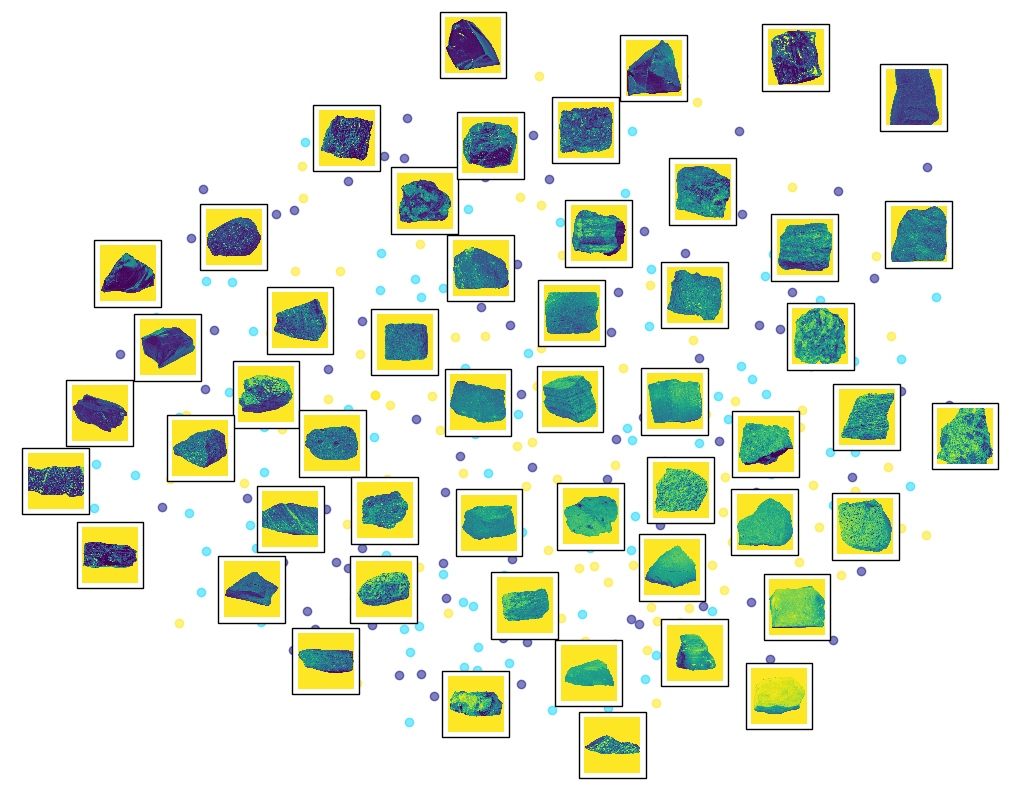

In [31]:
#Scatter plot with images
plot_digits(X = X_reduced_mds, y = rock_type_integer, images = imageog)
plt.show()

In [36]:
#Loading the human data for comparing all the models
import pandas as pd

human_data = np.array(pd.read_csv("/content/AML-HWK3-Q1/Dataset/mds_360.txt", sep='\s+', header=None)) #For Google Colab
# human_data = np.array(pd.read_csv("Dataset/mds_360.txt", sep='\s+', header=None)) # For VS CODE

***Question 4: PCA***

***Question 4: MDS***

In [58]:
from sklearn.manifold import MDS

mds2 = MDS(n_components=8, normalized_stress=False, random_state=42)
mds_data = mds2.fit_transform(imageog)

In the below function:

mtx1:
A standardized version of data1.

mtx2:
The orientation of data2 that best fits data1.

disparity:
m^2

In [91]:
from scipy.spatial import procrustes
mtx1, mtx2, disparity = procrustes(human_data, mds_data)
print("Disparity with MDS: ", disparity )

Disparity with MDS:  0.9841354483050566


In [93]:
#column wise correlation
for i in range(8):
    print("Correlation in dimension "+str(i)+": ", np.corrcoef(mtx1[:,i],mtx2[:,i])[0][1])

Correlation in dimension 0:  0.14640627503717066
Correlation in dimension 1:  0.1589637195263047
Correlation in dimension 2:  0.10293575759635841
Correlation in dimension 3:  0.06877220057943562
Correlation in dimension 4:  0.1104382985791533
Correlation in dimension 5:  0.13444765938720307
Correlation in dimension 6:  0.1576234742652841
Correlation in dimension 7:  0.11563854290387801


***Question 4: LLE***

In [99]:
rocks_lle8 = LocallyLinearEmbedding(n_components=8, random_state=42)
reduced_lle8 = rocks_lle8.fit_transform(imageog)

In [100]:
from scipy.spatial import procrustes
mtx1, mtx2, disparity = procrustes(human_data, reduced_lle8)
print("Disparity with LLE: ", disparity )

Disparity with LLE:  0.9846829791333178


In [101]:
for i in range(8):
    print("Correlation in dimension "+str(i)+": ", np.corrcoef(mtx1[:,i],mtx2[:,i])[0][1])

Correlation in dimension 0:  0.1885309653143731
Correlation in dimension 1:  0.15087516727469938
Correlation in dimension 2:  0.07263415663105438
Correlation in dimension 3:  0.13812549231201027
Correlation in dimension 4:  0.07924640015444724
Correlation in dimension 5:  0.09419310613163577
Correlation in dimension 6:  0.07594381897479341
Correlation in dimension 7:  0.157862674623058


***Question 5***

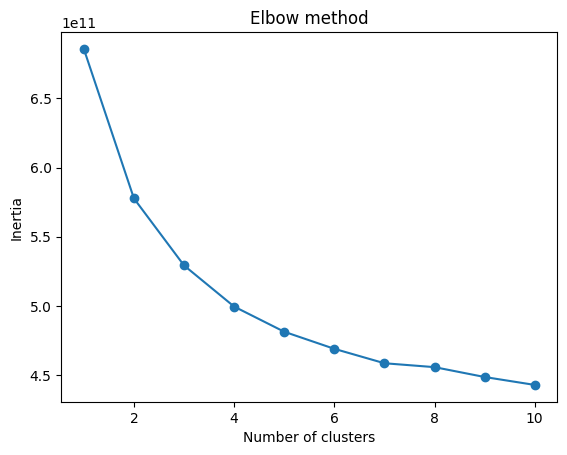

In [106]:
#Here we are implementing the Kmeans clustering algorithm on the image_downsized dataset which has atleast 90% variance reserved.
from sklearn.cluster import KMeans

inertias = []
#Finding out the best number of clusters using Elbow method
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(image_downsized)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Using elbow method we can say that 3 is the best number of clusters, as there is no significant difference between the inertia's (3 to 4, 4 to 5,... so on), but between 1 to 3 the inertia changes from 6.5+ to 5.25 (approx)

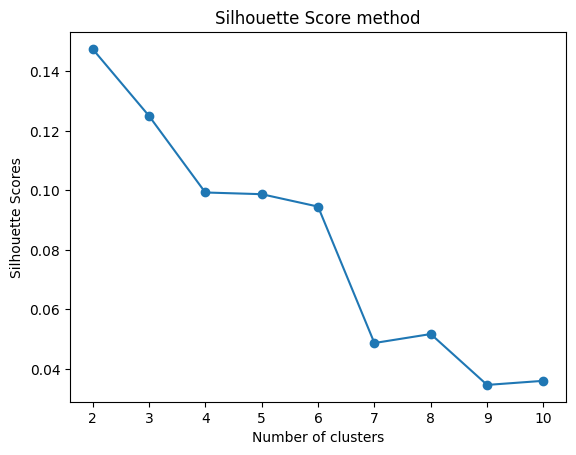

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Finding out the best number of clusters using silhouette score method
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(image_downsized)
    silhouette_scores.append(silhouette_score(image_downsized,kmeans.labels_))

plt.plot(range(2,11), silhouette_scores, marker='o')
plt.title('Silhouette Score method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

The above graph doesn't give the best number of clusters (which we already know from the labelled dataset, i.e. 3). We can't conclude anything from the above graph.

In [131]:
#Part b
#Implementing the Kmeans algorithm with number of clusters = 3
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(image_downsized)

#printing the labels for first 5 rocks
y_pred[:5]

array([1, 0, 2, 2, 1], dtype=int32)

In [132]:
#printing the inertia and the score
print("Inertia: ",kmeans.inertia_)
print("Score (higher is better): ",kmeans.score(image_downsized))

Inertia:  529248565633.06085
Score (higher is better):  -529248565633.06085


Here the clustering method which is used is hard clustering, we are categorizing the rocks into each of the labels. I,S,M.

Problem of preserving the label identities:
Because we don't know whether the cluster 0(or cluster 1 or 2) belongs to label I, S, or M, we can't calculate the accuracy of the k means algorithm directly. In order to find the best labels fit from the k means cluster algorithm, we will have to use hungarian algorithm for optimal mapping whcih will perform all the permutation combinations and will fit the best cluster labels, which are most similar to the true labels. Below is its implementation to calculate the accuracy score.

In [133]:
#Using Hungarian Algorithm for Optimal Mapping
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(rock_type_integer, y_pred)

row_ind, col_ind = linear_sum_assignment(-confusion_matrix)

mapped_predictions = np.zeros_like(y_pred)
for pred_label, true_label in zip(col_ind, row_ind):
    mapped_predictions[y_pred == pred_label] = true_label

accuracy = accuracy_score(rock_type_integer, mapped_predictions)
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")

Clustering Accuracy: 38.06%


The clustering accuracy is low (as expected) as the dataset was very dispersed even after preserving the variance (90%). From the graphs plotted above we can say that the data doesn't have a clear boundary to separate the clusters.

***Question 6***

In [ ]:
from sklearn.mixture import GaussianMixture

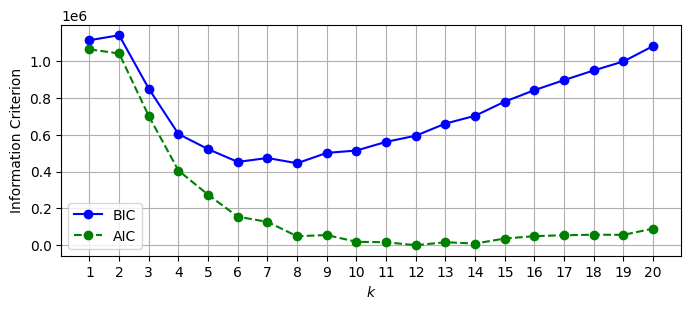

In [ ]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(image_downsized)
             for k in range(1, 21)]
bics = [model.bic(image_downsized) for model in gms_per_k]
aics = [model.aic(image_downsized) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 21), bics, "bo-", label="BIC")
plt.plot(range(1, 21), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.xticks(range(1, 21),range(1, 21))
plt.legend()
plt.grid()
plt.show()

In [ ]:
gm3 = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm3.fit(image_downsized)
predictions = gm3.predict(image_downsized)

In [ ]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import accuracy_score


confusion_matrix = np.zeros((3, 3))
for true, pred in zip(rock_type_integer, predictions):
    confusion_matrix[true, pred] += 1

row_ind, col_ind = linear_sum_assignment(-confusion_matrix)

mapped_predictions = np.zeros_like(predictions)
for pred_label, true_label in zip(col_ind, row_ind):
    mapped_predictions[predictions == pred_label] = true_label

accuracy = accuracy_score(rock_type_integer, mapped_predictions)
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")

Clustering Accuracy: 43.06%


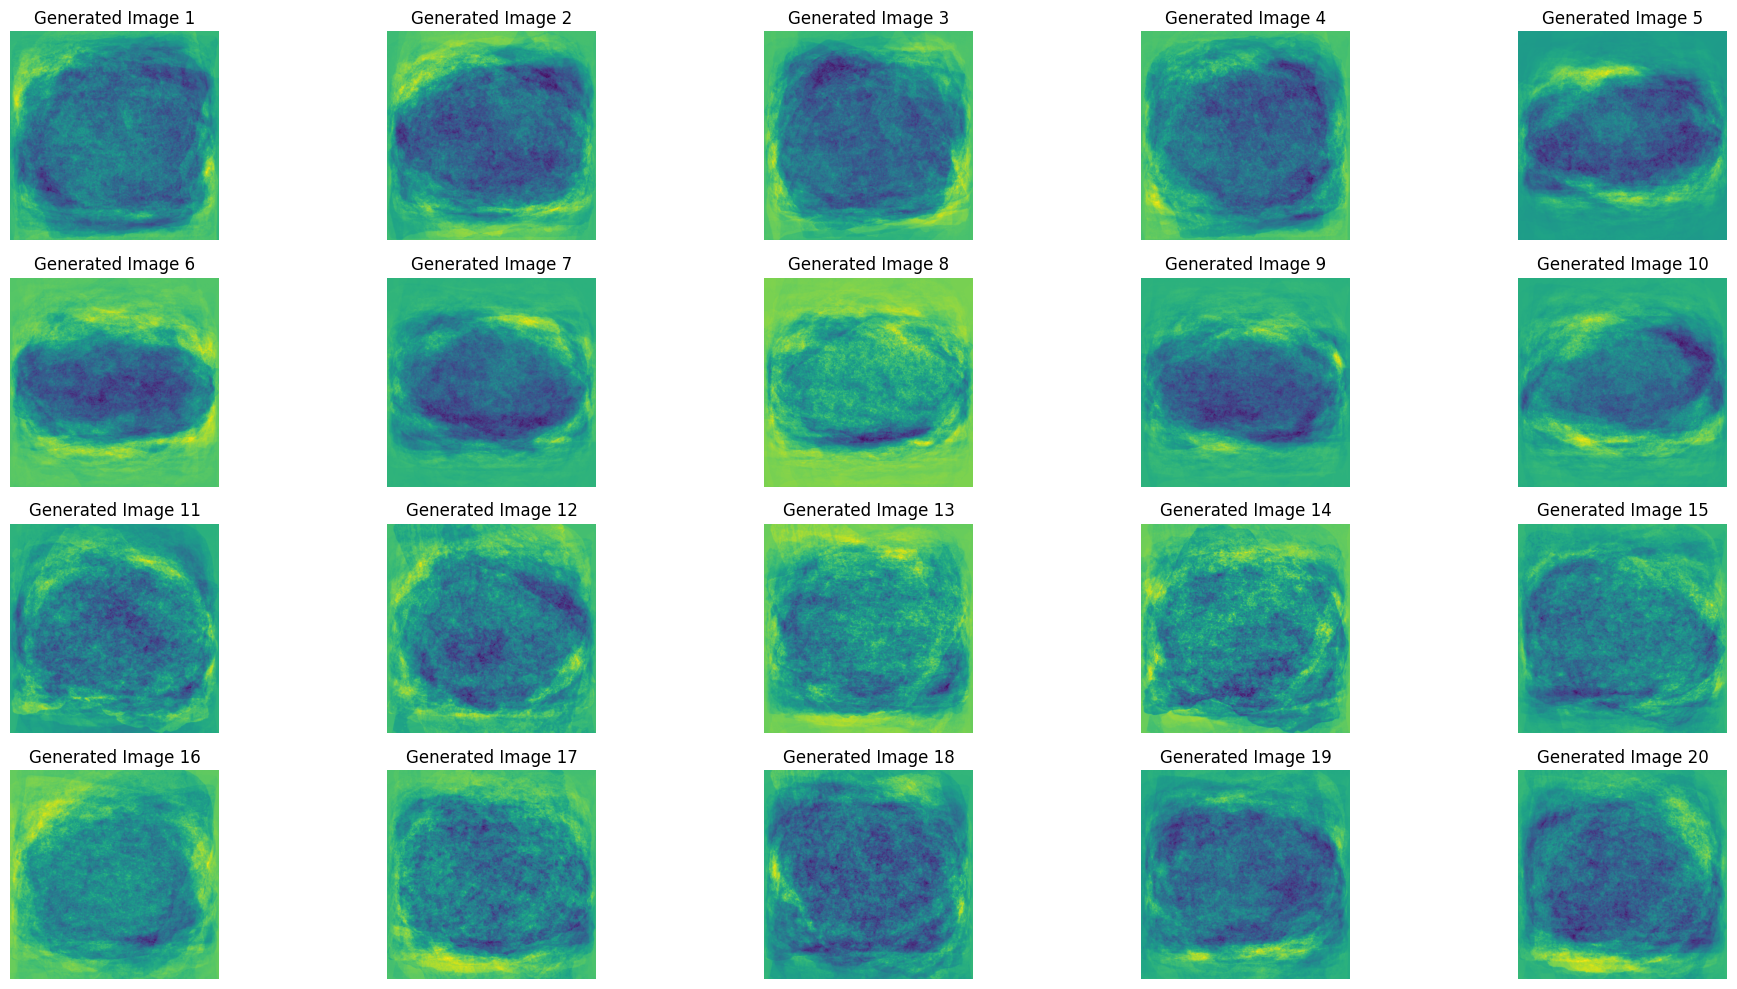

In [ ]:

n_samples = 20
generated_samples, _ = gm3.sample(n_samples=n_samples)

reconstructed_images = pca.inverse_transform(generated_samples)
reconstructed_images = reconstructed_images.reshape((n_samples, 800, 800))

plt.figure(figsize=(20, 10))
for i in range(n_samples):
    plt.subplot(4, 5, i + 1)
    plt.imshow(reconstructed_images[i])
    plt.axis('off')
    plt.title(f"Generated Image {i+1}")

plt.tight_layout()
plt.show()


***Question 7***